# **Support Vector Machine (SVM)**

support vector machine is a supervised learning used for calssification, regression and outliers detection.  

For classfication usage, SVM is to find a hyperplane ($w^TX+b=0$) which can separate the two different sets and has the largest distance to the nearest data (funtional margin).  
<img src="img/svm_component.png" width="600">  
The line to separate the 2 sets, called decision boundary, can be linear or non-linear.   
<img src="img/svm_classification.png" width="600">

We discuss linear case first. Supposed that there is a problem to classify gender by weight and height, with the data of 10 male and female.

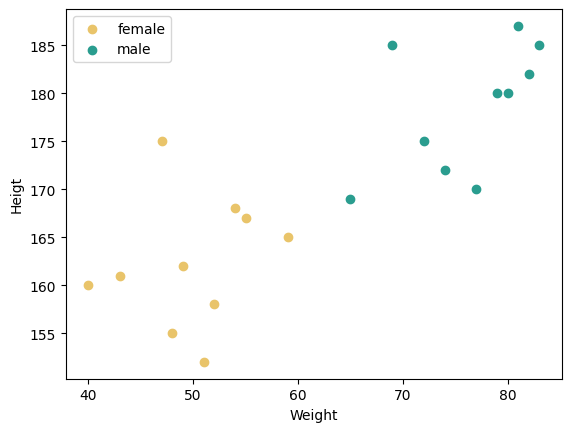

In [1]:
import numpy as np

W = np.array([40, 59, 48, 55, 43, 47, 52, 54, 51, 49, 80, 72, 77, 69, 74, 82, 81, 79, 83, 65])
H = np.array([160, 165, 155, 167, 161, 175, 158, 168, 152, 162, 180, 175, 170, 185, 172, 182, 187, 180, 185, 169])

G = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

import matplotlib.pyplot as plt
plt.scatter(W[0:10], H[0:10],c='#e9c46a' , label="female")
plt.scatter(W[10:], H[10:],c='#2a9d8f', label="male")
plt.xlabel("Weight")
plt.ylabel("Heigt")
plt.legend(loc="upper left")
plt.show()

Obviously, we can use a straight line to separate the yellow and green dots in above chart. The boundary may be look like this,  
<img src="img/svm_example_with_hyperplane.png" width="600">

Then we can transform this problem with mathematical expressions.  
$$x_i = \left[
\begin{array}{ccc}
    w_i \\
    h_i 
\end{array}
\right]$$

$$ y_i = \begin{cases} 1, \quad if \ male \\  -1, \quad if \ female \end{cases}$$  

So, the condition to ebe male is $w^Tx+b \geq 1$, and female is $w^Tx+b \leq -1$
  
<img src="img/svm_example_with_all_info.png" width="600">


Solving SVM can be a optimization problem and express as,  

$$ \max_w ({2 \over {||w||}})  \to \min_w {1 \over 2} w^Tw$$
$$ subject\ to \quad y_i(wx_i+b) \geq 1, \quad \forall i=0,...,n-1 $$

In realworld case, the 2 sets may not can be perfectly separated by the boundary, SVM can tolerance this case, called soft-margin. adding a slack varaible ($\xi_i$) to the optimization porblem means that we can tolerance the dot can in the margin and the vertical distiance is $\xi_i$. Then rewrite the problem as,  
$$ \min_w {1 \over 2} w^Tw+C \sum_i^n {\xi_i}$$
$$ subject\ to \quad y_i(wx_i+b) \geq 1-\xi_i, \quad \xi_i>0, \quad \forall i=0,...,n-1 $$

From constraint, we can said that $\xi_i \geq 1-y_i(wx_i+b)$, so objective function can also be rewrote as 
$$ \min_w \lbrace {1 \over 2} w^Tw+C \sum_i^n {1-y_i(wx_i+b)} \rbrace$$
Considering $xi_i >0$, the objective function will be, 
$$ \min_w \lbrace {1 \over 2} w^Tw+C \sum_i^n \max \lbrace 0, {1-y_i(wx_i+b)} \rbrace \rbrace$$
  
We define $ J = {1 \over 2} w^Tw+C \sum_i^n \max \lbrace 0, {1-y_i(wx_i+b)} \rbrace $

By gradien descent, if $1-y_i(wx_i+b) < 0$, $J = {1 \over 2} w^Tw + 0$
$${\partial{J} \over \partial{w}} = w $$
$${\partial{J} \over \partial{b}} = 0 $$

if $1-y_i(wx_i+b) > 0$, $J = {1 \over 2} w^Tw + C(1-y_i(wx_i+b))$
$${\partial{J} \over \partial{w}} = w - Cy_ix_i $$
$${\partial{J} \over \partial{b}} = -Cy_i $$

##So only if $1-y_i(wx_i+b) > 0$, whcih mean the boundary incorrectly separates, $w$ and $b$ will bed updated.

In [ ]:
# Inintialize the w1, w2, b, C and learning rate
X = np.stack((W, H),axis=1)
Y = G
w  = np.zeros(2)
b = 0
C = 0.1
lr = 0.002

epochs = 10000
i = 0
#arr = np.arange(20)
for i in range(epochs):
    loss = 0
    #np.random.shuffle(arr)
    for k in range(len(X)):
        if Y[k] * (w.dot(X[k]) + b) < 1:
            loss += 0.5 * w.T.dot(w) + 1 - Y[k] * (w.dot(X[k]) + b)
            w -= lr * (w - C * X[k].dot(Y[k]))
            b -= lr * (-C * Y[k])
        else:
            loss += 0.5 * w.T.dot(w)
    if i % 200 == 0:
        print(f'Epoch: {i}, w: {w}, b: {b}, error: {loss}')

Epoch: 0, w: [0.008016 0.004064], b: 0.0, error: 8.406003475583999
Epoch: 200, w: [ 0.38633157 -0.13148198], b: -0.0053999999999999986, error: 4.692380516649687
Epoch: 400, w: [ 0.41071659 -0.10830052], b: -0.0096, error: 8.885886138079634
Epoch: 600, w: [ 0.4030076  -0.10755158], b: -0.01400000000000001, error: 8.883876740927073
Epoch: 800, w: [ 0.40721004 -0.11365133], b: -0.0184, error: 9.01223211575412
Epoch: 1000, w: [ 0.40510394 -0.11530447], b: -0.022799999999999973, error: 9.053410391044663
Epoch: 1200, w: [ 0.40534436 -0.11806401], b: -0.027199999999999946, error: 9.115044027971312
Epoch: 1400, w: [ 0.40854991 -0.12376338], b: -0.03159999999999992, error: 6.42180412600009
Epoch: 1600, w: [ 0.40626817 -0.12557503], b: -0.03599999999999989, error: 6.455680167523777
Epoch: 1800, w: [ 0.40119951 -0.13009165], b: -0.04039999999999987, error: 6.537767335824865
Epoch: 2000, w: [ 0.40669193 -0.13506065], b: -0.04479999999999984, error: 4.6924535865727135
Epoch: 2200, w: [ 0.41177106 -

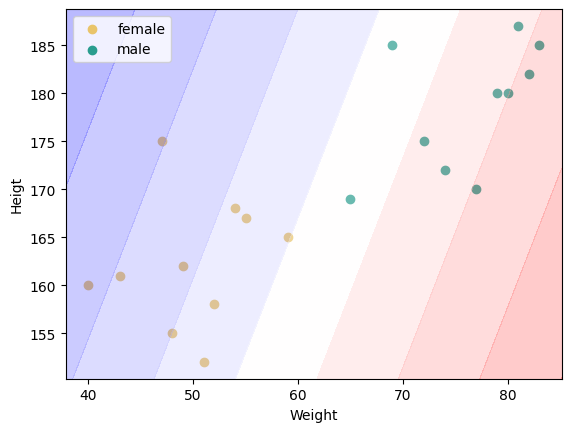

In [3]:
def classification(X, w, b):
    l = list(np.dot(X, w) + b)
    return np.array([-1 if x < 0 else 1 for x in l])


plt.scatter(X.T[0][0:10], X.T[1][0:10],c='#e9c46a' , label="female")
plt.scatter(X.T[0][10:], X.T[1][10:],c='#2a9d8f', label="male")
plt.xlabel("Weight")
plt.ylabel("Heigt")
plt.legend(loc="upper left")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 5), np.linspace(ylim[0], ylim[1], 4))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = (np.dot(xy, w) + b).reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.show()

The boundary coefficient seems different from what we expect, try to normalize X.

In [ ]:
# Inintialize the w1, w2, b, C and learning rate
X = np.stack((W, H),axis=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
Y = G
w  = np.zeros(2)
b = 0
C = 0.1
lr = 0.002

epochs = 10000
i = 0
#arr = np.arange(20)
for i in range(epochs):
    loss = 0
    #np.random.shuffle(arr)
    for k in range(len(X)):
        if Y[k] * (w.dot(X[k]) + b) < 1:
            loss += 0.5 * w.T.dot(w) + 1 - Y[k] * (w.dot(X[k]) + b)
            w -= lr * (w - C * X[k].dot(Y[k]))
            b -= lr * (-C * Y[k])
        else:
            loss += 0.5 * w.T.dot(w)
    if i % 200 == 0:
        print(f'Epoch: {i}, w: {w}, b: {b}, error: {loss}')

Epoch: 0, w: [0.00361774 0.00309572], b: -5.421010862427522e-20, error: 19.947877498722374
Epoch: 200, w: [0.09214458 0.07884855], b: -5.421010862427522e-20, error: 17.207859325157784
Epoch: 400, w: [0.09217404 0.07887376], b: -5.421010862427522e-20, error: 17.20699463068871
Epoch: 600, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, error: 17.20699434293565
Epoch: 800, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, error: 17.2069943428399
Epoch: 1000, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, error: 17.206994342839863
Epoch: 1200, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, error: 17.206994342839863
Epoch: 1400, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, error: 17.206994342839863
Epoch: 1600, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, error: 17.206994342839863
Epoch: 1800, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, error: 17.206994342839863
Epoch: 2000, w: [0.09217405 0.07887377], b: -5.421010862427522e-20, err

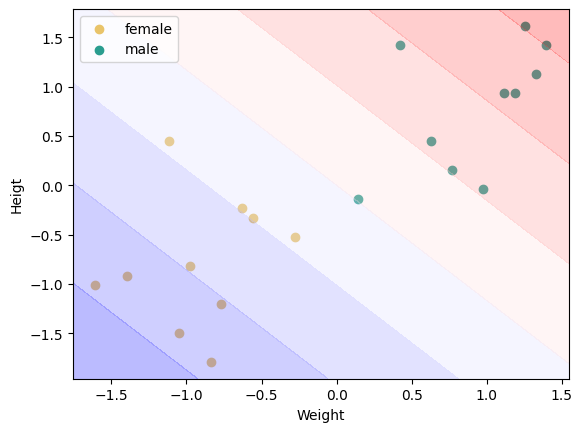

In [5]:
plt.scatter(X.T[0][0:10], X.T[1][0:10],c='#e9c46a' , label="female")
plt.scatter(X.T[0][10:], X.T[1][10:],c='#2a9d8f', label="male")
plt.xlabel("Weight")
plt.ylabel("Heigt")
plt.legend(loc="upper left")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 5), np.linspace(ylim[0], ylim[1], 4))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = (np.dot(xy, w) + b).reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.show()

SVM can not only implement classification problem, can also be used as a regression model. Different from th find a hyperplane with the smallest margin to nearest dot, SVR is to identify a hyperplane that has the smallest margin to the farest dot (make sure all dots are within the margin.)  
Let manually create a set of data that fit equation $Y = 5X+3$ and with error.

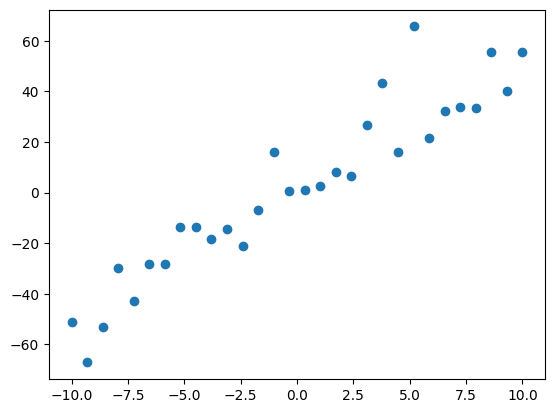

In [21]:
X = np.linspace(-10, 10, num=30)
Y = 5 * X + 3 + np.random.randn(30) * 10
plt.scatter(X, Y)
plt.show()

With this example, we can plot a line best fit this distribution and with the least $\varepsilon$.  
<img src="img/svm_regression.png" width="600">  
  
Similarly, this problem can be expressed as an optimization problem,  
$$ \min_w \lbrace {1 \over 2} w^Tw + \varepsilon \rbrace $$
$$ subject\ to -\varepsilon \leq y_i - (wx_i+b) \leq \varepsilon, \quad \varepsilon>0 $$
  
Then we can define the loss function as 
$$J = {1 \over 2} w^Tw + |y_i - (wx_i+b)|  - \varepsilon $$
  
So that by derivate with repect to $w$ and $b$, we can get the updated value of each iteration.


If $y_i - (wx_i+b) > 0$, $J = {1 \over 2} w^Tw + y_i - (wx_i+b) - \varepsilon $
$$ {\partial{J} \over \partial{w}} = w-x_i $$
$$ {\partial{J} \over \partial{b}} = -1 $$
If $y_i - (wx_i+b) < 0$, $J = {1 \over 2} w^Tw  -(y_i - (wx_i+b)) - \varepsilon$
$$ {\partial{J} \over \partial{w}} = w +x_i$$
$$ {\partial{J} \over \partial{b}} = 1 $$


In [46]:
# Inintialize the w1, w2, b, C and learning rate
w  = 0
b = 0
lr = 0.03
epsilon = 0.01

epochs = 10000
i = 0
#arr = np.arange(20)
for i in range(epochs):
    loss = 0
    #np.random.shuffle(arr)
    for k in range(len(X)):
        y_pred = w * X[k] + b
        if Y[k] - y_pred > 0 :
            loss += 0.5 * w ** 2 + (Y[k] - y_pred) - epsilon
            w -= lr * (w - X[k])
            b -= lr * (-1)
        else:
            loss += 0.5 * w ** 2 - (Y[k] - y_pred) - epsilon
            w -= lr * (w + X[k])
            b -= lr * (1)
    if i % 200 == 0:
        print(f'Epoch: {i}, w: {w}, b: {b}, error: {loss}')

Epoch: 0, w: 3.0995698461027876, b: 0.11999999999999997, error: 650.6818079904244
Epoch: 200, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 400, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 600, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 800, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 1000, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 1200, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 1400, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 1600, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 1800, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 2000, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 2200, w: 3.9496382531080845, b: 3.119999999999994, error: 513.0327312215597
Epoch: 24

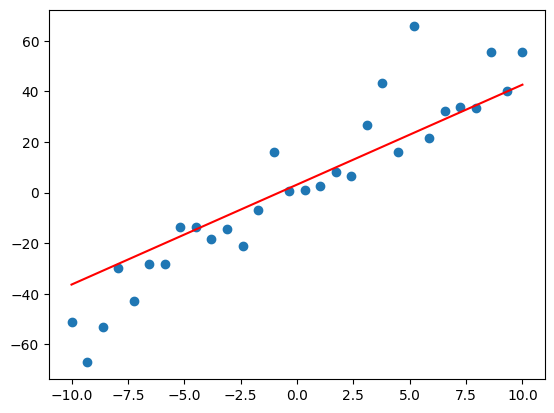

In [47]:
Y_pred = w * X + b

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

In [ ]:
# Inintialize the w1, w2, b, C and learning rate
X = np.stack((W, H),axis=1)
Y = G
w  = np.zeros(2)
b = 0
C = 0.1
lr = 0.002

epochs = 10000
i = 0
#arr = np.arange(20)
for i in range(epochs):
    loss = 0
    #np.random.shuffle(arr)
    for k in range(len(X)):
        if G[k] * (w.dot(X[k]) + b) < 1:
            loss += 0.5 * w.T.dot(w) + 1 - G[k] * (w.dot(X[k]) + b)
            w -= lr * (w - C * X[k].dot(G[k]))
            b -= lr * (-C * G[k])
        else:
            loss += 0.5 * w.T.dot(w)
    if i % 200 == 0:
        print(f'Epoch: {i}, w: {w}, b: {b}, error: {loss}')

In [ ]:
from typing import Tuple, List
import math
class SVM:
    def __init__(self, C: float = 0.1, lr: float = 0.001, epochs: int = 10000):
        """
        Args:
            C (float): regularization parameter
            lr (float): learning rate
            epochs (int): number of epochs
        """
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.loss = None

    def fit(self, X, Y) -> Tuple[List, float]:
        """Train the SVM model
        Args:
            X (np.array): feature matrix
            Y (np.array): target vector
        Returns:
            np.array: weights
            float: bias
        """
        if X.ndim == 1:
            self.n_features = 1
            self.X = X.reshape(-1, len(X))
        else:
            self.n_features = len(X.T)
            self.X = X
        self.Y = Y
        self.w  = np.zeros(self.n_features)
        self.b = 0
        for i in range(self.epochs):
            self.loss = 0
            #np.random.shuffle(arr)
            for k in range(len(X)):
                if Y[k] * (self.w.dot(X[k]) + self.b) < 1:
                    self.loss += 0.5 * self.w.T.dot(self.w) + 1 - Y[k] * (self.w.dot(X[k]) + self.b)
                    self.w -= self.lr * (self.w - self.C * X[k].dot(Y[k]))
                    self.b -= self.lr * (-self.C * Y[k])
                else:
                    self.loss += 0.5 * self.w.T.dot(self.w)

        return self.w, self.b

    def getLoss(self) -> int:
        """Get the loss value
        Returns:
            int: loss value
        """
        return self.loss[0]
    
    def predict(self, X) -> np.array:
        """Predict the target vector
        Args:
            X (np.array): feature matrix
        Returns:
            np.array: predicted target vector
        """
        return self.w.dot(X)+self.b
    
    def plot(self, xlabel: str = '', ylabel: str = ''):
        """Plot the decision boundary
        Args:
            xlabel (str): x-axis label
            ylabel (str): y-axis label
        """
        colormap = np.array(['#e9c46a','#2a9d8f'])
        Y = np.array([0 if x==-1 else 1 for x in list(self.Y)])
        plt.scatter(self.X.T[0], self.X.T[1],c=colormap[Y])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #plt.legend(loc="upper left")
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        l = []
        for i in range(1, int(math.sqrt(len(Y)))):
            if len(self.Y)%i == 0:
                l.append([i, len(Y)/i])
        
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], int(l[-1][0])), np.linspace(ylim[0], ylim[1], int(l[-1][1])))
        xy = np.vstack([xx.ravel(), yy.ravel()]).T
        Z = (np.dot(xy, self.w) + self.b).reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

In [ ]:
W = np.array([40, 59, 48, 55, 43, 47, 52, 54, 51, 49, 80, 72, 77, 69, 74, 82, 81, 79, 83, 65])
H = np.array([160, 165, 155, 167, 161, 175, 158, 168, 152, 162, 180, 175, 170, 185, 172, 182, 187, 180, 185, 169])

G = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X = np.stack((W, H),axis=1)
Y = G

svm = SVM()
svm.fit(X,Y)
svm.plot()

In [ ]:
class SVR:
    def __init__(self, lr: float = 0.001, epsilon: float = 0.01, epochs: int = 1000):
        """
        Args:
            lr (float): learning rate
            epsilon (float): epsilon value
            epochs (int): number of epochs
        """
        self.lr = lr
        self.epsilon = epsilon
        self.epochs = epochs

    def fit(self, X, Y) -> Tuple[List, float]:
        """Train the SVR model
        Args:
            X (np.array): feature matrix
            Y (np.array): target vector
        Returns:
            np.array: weights
            float: bias
        """
        if X.ndim == 1:
            self.n_features = 1
            self.X = X.reshape(-1, len(X))
        else:
            self.n_features = len(X.T)
            self.X = X
        self.Y = Y
        self.w  = np.zeros(self.n_features)
        self.b = 0
        
        i = 0
        for i in range(self.epochs):
            self.loss = 0
            y_pred = self.w.dot(self.X) + self.b
            for k in range(len(y_pred)):
                if Y[k] - y_pred[k] > 0 :
                    self.loss += 0.5 * self.w ** 2 + (Y[k] - y_pred[k]) - self.epsilon
                    self.w -= self.lr * (self.w - self.X.T[k])
                    self.b -= self.lr * (-1)
                else:
                    self.loss += 0.5 * self.w ** 2 - (Y[k] - y_pred[k]) - self.epsilon
                    self.w -= self.lr * (self.w + self.X.T[k])
                    self.b -= self.lr * (1)
        i += 1
        return self.w, self.b
            
    def getLoss(self) -> int:
        """Get the loss value
        Returns:
            int: loss value
        """
        return self.loss[0]
    
    def predict(self, X) -> np.array:
        """Predict the target vector
        Args:
            X (np.array): feature matrix
        Returns:
            np.array: predicted target vector
        """
        return self.w.dot(X)+self.b
    
    def plot(self, xlabel: str = '', ylabel: str = ''):
        """Plot the decision boundary
        Args:
            xlabel (str): x-axis label
            ylabel (str): y-axis label
        """
        self.y_pred = self.w * self.X + self.b
        plt.scatter(self.X, self.Y) 
        plt.plot([min(self.X[0]), max(self.X[0])], [min(self.y_pred[0]), max(self.y_pred[0])], color='red')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

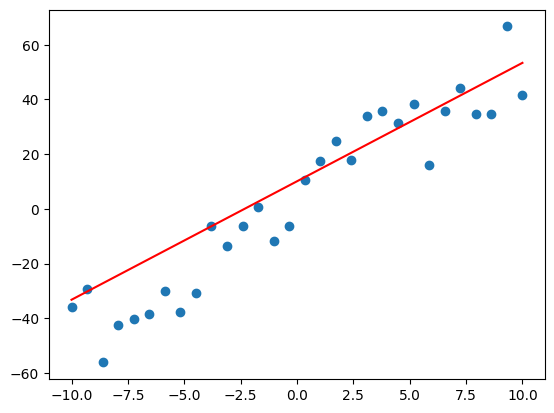

[[-33.22694205 -30.24025639 -27.25357073 -24.26688507 -21.28019942
  -18.29351376 -15.3068281  -12.32014244  -9.33345678  -6.34677112
   -3.36008546  -0.37339981   2.61328585   5.59997151   8.58665717
   11.57334283  14.56002849  17.54671415  20.53339981  23.52008546
   26.50677112  29.49345678  32.48014244  35.4668281   38.45351376
   41.44019942  44.42688508  47.41357073  50.40025639  53.38694205]]


In [126]:
X = np.linspace(-10, 10, num=30)
Y = 5 * X + 3 + np.random.randn(30) * 10

svr = SVR(lr = 0.05, epsilon = 0.01, epochs = 10000)
svr.fit(X,Y)

svr.plot()
print(svr.Y_pred)